

## 설치파일

In [2]:
#3.10.9
!pip install konlpy
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 36.6 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Konlpy를 이용한 형태소 나누기  

In [3]:
from konlpy.tag import Okt
import re

# Okt 형태소 분석기 객체 생성
okt = Okt()

# 문장 텍스트
text = "나는 자연어 처리를 배우고 있습니다. 이제 한글 텍스트 마이닝을 시작해보겠습니다!"

# 1. 텍스트 전처리
clean_text = re.sub(r'[^가-힣\s]', '', text)  # 한글과 공백을 제외한 모든 문자 제거, \s: 공백 문자 ^ :부정, 한글의 모든 음절:가-힣

# 2. 단어 토큰화
words = okt.morphs(clean_text)  # 문장을 형태소로 분해하여 단어 토큰화

# 3. 형태소 분석
pos_tags = okt.pos(clean_text)   # 형태소에 품사 태깅

print("전처리된 텍스트:", clean_text)
print("단어 토큰화 결과:", words)
print("형태소 분석 결과:", pos_tags)

전처리된 텍스트: 나는 자연어 처리를 배우고 있습니다 이제 한글 텍스트 마이닝을 시작해보겠습니다
단어 토큰화 결과: ['나', '는', '자연어', '처리', '를', '배우고', '있습니다', '이제', '한글', '텍스트', '마', '이닝', '을', '시작', '해보겠습니다']
형태소 분석 결과: [('나', 'Noun'), ('는', 'Josa'), ('자연어', 'Noun'), ('처리', 'Noun'), ('를', 'Josa'), ('배우고', 'Verb'), ('있습니다', 'Adjective'), ('이제', 'Noun'), ('한글', 'Noun'), ('텍스트', 'Noun'), ('마', 'Noun'), ('이닝', 'Noun'), ('을', 'Josa'), ('시작', 'Noun'), ('해보겠습니다', 'Verb')]


## 간단한 텍스트 전처리

In [ ]:
sentence = "one,two,three"
words = sentence.split(',')
words2 = sentence.splitlines()
print(words)
print(words2)

text = "  hello world  "
clean_text = text.strip()
print(clean_text)

sentence = "안녕  : 하잇"
words = sentence.strip().split(':')
print(words)
a, b =words
print(a)
print(b)

['one', 'two', 'three']
['one,two,three']
hello world
['안녕  ', ' 하잇']
안녕  
 하잇


In [ ]:
# 빈칸 지우기
text = "  안녕하세요   "
clean_text = text.strip()
print(clean_text)

안녕하세요


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Stopwords 사전구축 및 제거

In [7]:
from konlpy.tag import Okt
import re

def remove_stopwords_nouns_only(sentence, stopwords_file):
    #Okt 형태소 분석기 객체 생성
    okt = Okt()

    # 불용어 파일 읽기
    with open(stopwords_file, 'r', encoding='utf-8') as f:
        stopwords = f.read().splitlines()

    #문장에서 명사만 추출
    nouns = okt.nouns(sentence)

    # 불용어가 아닌 명사만 필터링
    filtered_nouns = []
    for noun in nouns:
        if noun not in stopwords:
            filtered_nouns.append(noun)

    #필터링된 명사들을 공백으로 구분하여 다시 문장 형태로 복원
    cleaned_sentence = ' '.join(filtered_nouns)

    return cleaned_sentence

# 새로운 문장
new_sentence = "이 문장에는 단어1과 단어2가 존재합니다. 하지만 단어2는 매우 불필요한 단어 입니다."
# 불용어 리스트가 저장된 텍스트 파일 경로
stopwords_file = '/content/drive/MyDrive/놀이터/데이터/stopwords.txt'

# 불용어를 제거한 결과 출력
cleaned_sentence = remove_stopwords_nouns_only(new_sentence, stopwords_file)
print(new_sentence)
print(cleaned_sentence)

이 문장에는 단어1과 단어2가 존재합니다. 하지만 단어2는 매우 불필요한 단어 입니다.
이 문장 과 존재


## Stopwords를 활용한 텍스트 데이터 명사추출

In [9]:
import pandas as pd
from konlpy.tag import Okt

# 불용어 파일 읽기 함수
def read_stopwords(stopwords_file):
    with open(stopwords_file, 'r', encoding='utf-8') as f:
        stopwords = f.read().splitlines()
    return stopwords

# 명사 추출 및 불용어 제거 함수
def remove_stopwords_nouns(sentence, stopwords):
    okt = Okt()
    nouns = okt.nouns(sentence)

    # 리스트 컴프리헨션 대신 for문 사용
    filtered_nouns = []
    for noun in nouns:
        if noun not in stopwords:
            filtered_nouns.append(noun)

    return ' '.join(filtered_nouns)

# CSV 파일 처리 함수
def process_csv(input_csv, stopwords_file, output_csv):
    # 불용어 목록 읽기
    stopwords = read_stopwords(stopwords_file)

    # 입력 CSV 파일 읽기
    df = pd.read_csv(input_csv, encoding='utf-8')
    df['text'] = df['text'].fillna('').astype(str)
    # df['text']의 각 문장에 대해 명사 추출 및 불용어 제거 처리
    # apply 대신 for문 사용
    processed_texts = []
    for sentence in df['text']:
        processed_text = remove_stopwords_nouns(sentence, stopwords)
        processed_texts.append(processed_text)

    df['processed_text'] = processed_texts

    # 처리된 데이터를 새로운 CSV 파일로 저장
    df.to_csv(output_csv, index=False, encoding='utf-8-sig')

# 사용 예시
input_csv = '/content/drive/MyDrive/놀이터/데이터/input_sample.csv' # 원본 CSV 파일 경로
stopwords_file = '/content/drive/MyDrive/놀이터/데이터/stopwords.txt'# 불용어 리스트 파일 경로
output_csv = '/content/drive/MyDrive/놀이터/데이터/output_sample.csv'# 결과를 저장할 새 CSV 파일 경로


# CSV 파일 처리 실행
process_csv(input_csv, stopwords_file, output_csv)

## 추출명사를 활용한 감성분석

In [15]:
# 단어와 점수 매핑을 생성하는 함수
def create_word_score_mapping(filepath):
    word_score_mapping = {}
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            word, score = line.strip().split('+')
            word_score_mapping[word] = int(score)
    return word_score_mapping

# 긍정과 부정 단어 점수 파일
positive_filepath = '/content/drive/MyDrive/놀이터/데이터/positive_words.txt'
negative_filepath = '/content/drive/MyDrive/놀이터/데이터/negative_words.txt'

# 매핑 생성
positive_scores = create_word_score_mapping(positive_filepath)
negative_scores = create_word_score_mapping(negative_filepath)

### 1. 텍스트 입력기반 감성분석

In [16]:
from konlpy.tag import Okt

def analyze_sentiment(sentence, positive_scores, negative_scores):
    okt = Okt()
    score = 0

    # 문장에서 명사 추출
    words = okt.morphs(sentence)

    # 각 단어의 점수 계산
    for word in words:
        if word in positive_scores:
            score += positive_scores[word]
        elif word in negative_scores:
            score -= negative_scores[word]

    # 최종 점수를 기반으로 감정 결정
    if score > 0:
        return "긍정", score
    elif score < 0:
        return "부정", score
    else:
        return "중립", score

# 사용 예시
sentence = "이 영화는 정말 재미와 흥미를 나에게 주었고, 스케일이 엄청나다."
sentence2 = "이 영화는 주인공의 연기가 노잼이여서 싫다. 하지만 흥미는 있었다."
sentiment, total_score = analyze_sentiment(sentence2, positive_scores, negative_scores)
print(("문장의 감정 분석 결과: {}, 점수: {}").format(sentiment,total_score))

문장의 감정 분석 결과: 부정, 점수: -2


### 2.  csv파일을 활용한 감성분석

In [17]:
import pandas as pd
from konlpy.tag import Okt

# 단어와 점수 매핑을 생성하는 함수
def create_word_score_mapping(filepath):
    word_score_mapping = {}
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            word, score = line.strip().split('+')
            word_score_mapping[word] = int(score)
    return word_score_mapping

# 감정 점수 계산 함수
def calculate_sentiment_score(sentence, positive_scores, negative_scores):
    okt = Okt()
    score = 0
    words = okt.morphs(sentence)
    for word in words:
        if word in positive_scores:
            score += positive_scores[word]
        elif word in negative_scores:
            score -= negative_scores[word]
    return score

# CSV 파일 처리 및 감정 점수 계산
def process_csv_with_sentiment(input_csv, positive_filepath, negative_filepath, output_csv):
    positive_scores = create_word_score_mapping(positive_filepath)
    negative_scores = create_word_score_mapping(negative_filepath)

    df = pd.read_csv(input_csv, encoding="utf-8")
    df['processed_text'] = df['processed_text'].fillna('').astype(str)
    # 감정 점수를 저장할 빈 리스트 초기화
    scores = []

    # for문을 사용하여 각 텍스트의 감정 점수 계산
    for text in df['text']:
        score = calculate_sentiment_score(text, positive_scores, negative_scores)
        scores.append(score)

    # 계산된 감정 점수를 DataFrame의 새로운 열로 추가
    df['score'] = scores

    # 결과를 새로운 CSV 파일로 저장
    df.to_csv(output_csv, index=False, encoding='utf-8-sig')

# 파일 경로 설정
input_csv = '/content/drive/MyDrive/놀이터/데이터/output_sample.csv'  # 원본 CSV 파일 경로
positive_filepath = '/content/drive/MyDrive/놀이터/데이터/positive_words.txt'  # 긍정 단어 점수 파일 경로
negative_filepath = '/content/drive/MyDrive/놀이터/데이터/negative_words.txt'  # 부정 단어 점수 파일 경로
output_csv = '/content/drive/MyDrive/놀이터/데이터/output_scores.csv'  # 결과 CSV 파일 경로

# CSV 파일 처리 실행
process_csv_with_sentiment(input_csv, positive_filepath, negative_filepath, output_csv)

## 워드클라우드

In [18]:
#pip install wordcloud

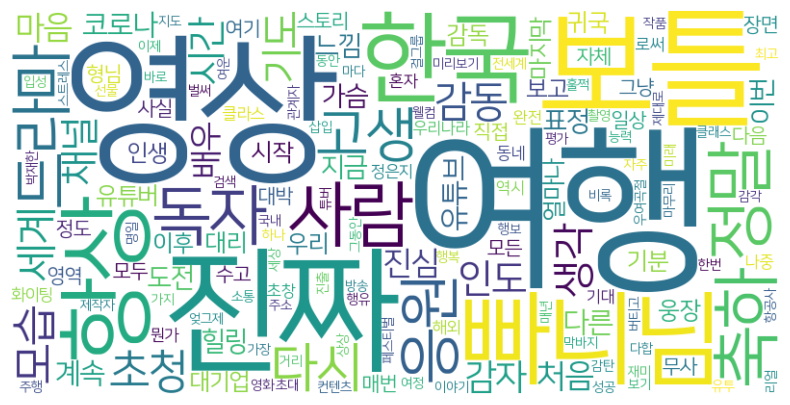

In [19]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 데이터프레임의 'text' 열로부터 워드 클라우드 생성하는 함수
def create_wordcloud_from_df(df, min_word_length, min_word_frequency):
    # 'text' 열의 모든 텍스트를 하나의 문자열로 결합하기 위한 빈 문자열 초기화
    text = ""

    # for문을 사용하여 각 행의 'text' 열 값을 하나의 문자열로 결합
    for review in df['processed_text']:
        text += str(review) + " "  # 각 리뷰 사이에 공백 추가

    # 마지막에 추가된 공백 제거
    text = text.strip()

    # 단어 빈도수 계산
    word_counts = Counter(text.split())

    # 최소 단어 길이와 최소 단어 빈도에 따라 필터링
    filtered_word_counts = {
      word: freq
      for word, freq in word_counts.items()
      if len(word) >= min_word_length and freq >= min_word_frequency
    }

    # 워드 클라우드 생성
    wordcloud = WordCloud(font_path='/content/drive/MyDrive/놀이터/데이터/나눔폰트/NanumSquare_acR.ttf', background_color='white', width=800, height=400).generate_from_frequencies(filtered_word_counts)

    # 워드 클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# CSV 파일 로드
csv_file_path = '/content/drive/MyDrive/놀이터/데이터/output_sample.csv'  # CSV 파일 경로를 여기에 입력
df = pd.read_csv(csv_file_path, encoding="utf-8")
df['processed_text'] = df['processed_text'].astype(str)

# 최소 단어 길이 및 빈도 설정
min_word_length = 2
min_word_frequency = 2

# 워드 클라우드 생성 함수 호출
create_wordcloud_from_df(df, min_word_length, min_word_frequency)

## 동의어 사전을 활용한 동의어 바꾸기

In [ ]:
import pandas as pd

# 동의어 바꾸기 규칙 파일을 로드하는 함수
def load_replacement_rules(rules_filepath):
    replacement_rules = {}
    with open(rules_filepath, 'r', encoding='utf-8') as file:
        for line in file:
            target, synonyms = line.strip().split(':')
            target = target.strip()
            synonyms = [synonym.strip() for synonym in synonyms.split(',')]
            for synonym in synonyms:
                replacement_rules[synonym] = target
    return replacement_rules

# 텍스트 내 단어를 규칙에 따라 바꾸는 함수
def replace_words(text, replacement_rules):
    for synonym, target in replacement_rules.items():
        text = text.replace(synonym, target)
    return text

# DataFrame 로드 (예시)

df = pd.read_csv('/content/drive/MyDrive/놀이터/데이터/text_dict.csv', encoding="utf-8-sig")
df['text'] = df['text'].astype(str)

# 단어 변환 규칙 파일 로드
replacement_rules = load_replacement_rules('/content/drive/MyDrive/놀이터/데이터/word_replacement_rules.txt')

# 변환된 텍스트를 저장할 리스트
replaced_texts = []

# 각 텍스트에 대해 변환 수행
for text in df['text']:
    replaced_text = replace_words(text, replacement_rules)
    replaced_texts.append(replaced_text)

# 변환된 텍스트를 DataFrame의 새로운 열로 추가
df['text_final'] = replaced_texts

# 변환된 텍스트 출력
print(df['text_final'])

0    가라고 해서 가려고 하니 가지말라 해서 안가려고 하니 계속가라 하더라
Name: text_final, dtype: object


### 동의어 바꾸기 csv파일에 저장

In [ ]:
import pandas as pd

# 동의어 바꾸기 규칙 파일을 로드하는 함수
def load_replacement_rules(rules_filepath):
    replacement_rules = {}
    with open(rules_filepath, 'r', encoding='utf-8') as file:
        for line in file:
            target, synonyms = line.strip().split(':')
            target = target.strip()
            synonyms = [synonym.strip() for synonym in synonyms.split(',')]
            for synonym in synonyms:
                replacement_rules[synonym] = target
    return replacement_rules

# 텍스트 내 단어를 규칙에 따라 바꾸는 함수
def replace_words(text, replacement_rules):
    for synonym, target in replacement_rules.items():
        text = text.replace(synonym, target)
    return text

# DataFrame 로드 (예시)
df = pd.read_csv('input_sample2.csv', encoding="utf-8-sig")
df['text'] = df['text'].astype(str)

# 단어 변환 규칙 파일 로드
replacement_rules = load_replacement_rules('word_replacement_rules2.txt')

# 변환된 텍스트를 저장할 리스트
replaced_texts = []

# 각 텍스트에 대해 변환 수행
for text in df['text']:
    replaced_text = replace_words(text, replacement_rules)
    replaced_texts.append(replaced_text)

# 변환된 텍스트를 DataFrame의 새로운 열로 추가
df['text_final'] = replaced_texts

# 변환된 결과를 새로운 CSV 파일로 저장
output_replacements = 'output_replacements.csv'
df.to_csv(output_replacements, index=False, encoding='utf-8-sig')

# 변환된 텍스트 출력
print(df['text_final'])

# 최종 변환된 텍스트를 별도의 CSV 파일로 저장
final_text_df = pd.DataFrame(df)
final_text_csv = 'final_text.csv'
final_text_df.to_csv(final_text_csv, index=False, encoding='utf-8-sig')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/놀이터/데이터/input_sample2.csv'